# Required imports:

In [138]:
# imports:

import numpy as np
import pickle
import random
from sklearn import metrics
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm, tree
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from skimage import feature
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import mode
import matplotlib.pyplot as plt # for data visualization purposes
import itertools

# Utility functions for saving and loading files from disc:

In [161]:
# functions:

dir = 'G:/University/Ph.D/AI for Sybersecurity/Project/Cleaned Datasets/'

def save_obj(obj, name):
    with open(dir + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)


def load_obj(name):
    with open(dir + name + '.pkl', 'rb') as f:
        return pickle.load(f)

# Loading the dataset:

In [3]:
# Load the cleaned dataset form the Pickle files:

dataset = load_obj('trainX')
labels = load_obj('trainY')
test_dataset = load_obj('testX')
test_labels = load_obj('testY')

print('shape of the train set: ' + str(dataset.shape))
print('shape of the train labels: ' + str(labels.shape))
print('shape of the test set: ' + str(test_dataset.shape))
print('shape of the test labels: ' + str(test_labels.shape))

shape of the train set: (1796, 224, 224)
shape of the train labels: (1796,)
shape of the test set: (599, 224, 224)
shape of the test labels: (599,)


# Feature Extraction
Extracting local binary pattern (LBP) features from the train set images

In [22]:
# extract local binary pattern (LBP) features from the dataset images (train set)

lbp_features = []
num_points = 100
radius = 8
eps=1e-7
for img in dataset:
    lbp = feature.local_binary_pattern(img, num_points, radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, num_points + 3), range=(0, num_points + 2))
    # normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + eps)
    lbp_features.append(hist)
    
lbp_features = np.array(lbp_features)
print('shape of the resulted feature vectors: ' + str(lbp_features.shape))
    
# save the result into a pickle file:
save_obj(lbp_features, 'train_lbp_featurs')

shape of the resulted feature vectors: (1796, 102)


# SVM 5-fold cross-validation

In [23]:
# 5-fold cross-validation for a support vector machine (SVM) model:

kf = KFold(n_splits=5, shuffle=True, random_state=12)
accuracy_sum = 0
for train_index, test_index in kf.split(lbp_features):
    # split tha data based on the current fold:
    trainX = lbp_features[train_index]
    trainY = labels[train_index]
    testX = lbp_features[test_index]
    testY = labels[test_index]
    
    # Train the model:
    model = svm.SVC(kernel='rbf', probability=True)
    model.fit(trainX, trainY)
    
    predY = model.predict(testX) # use the trained model for prediction
    accuracy = metrics.accuracy_score(testY, predY) # calculate tha accuracy metric for the predictions
    accuracy_sum += accuracy
    print("the accuracy score for this fold is: " + str(accuracy))
    
print("The average accuracy score is ", accuracy_sum / 5)

the accuracy score for this fold is: 0.08055555555555556
the accuracy score for this fold is: 0.09749303621169916
the accuracy score for this fold is: 0.08356545961002786
the accuracy score for this fold is: 0.08356545961002786
the accuracy score for this fold is: 0.10027855153203342
The average accuracy score is  0.08909161250386878


# KNN 5-fold cross-validation

In [59]:
# 5-fold cross-validation for the KNN model:

kf = KFold(n_splits=5, shuffle=True, random_state=24)
accuracy_sum = 0
for train_index, test_index in kf.split(lbp_features):
    # split tha data based on the current fold:
    trainX = lbp_features[train_index]
    trainY = labels[train_index]
    testX = lbp_features[test_index]
    testY = labels[test_index]
    
    # Train the model:
    model = KNeighborsClassifier()
    model.fit(trainX, trainY)
    
    predY = model.predict(testX) # use the trained model for prediction
    accuracy = metrics.accuracy_score(testY, predY) # calculate tha accuracy metric for the predictions
    accuracy_sum += accuracy
    print("the accuracy score for this fold is: " + str(accuracy))
    
print("The average accuracy score is ", accuracy_sum / 5)

the accuracy score for this fold is: 0.041666666666666664
the accuracy score for this fold is: 0.1
the accuracy score for this fold is: 0.06666666666666667
the accuracy score for this fold is: 0.041666666666666664
the accuracy score for this fold is: 0.058823529411764705
The average accuracy score is  0.06176470588235293


# Random Forest 5-fold cross-validation

In [26]:
# 5-fold cross-validation for the Random Forest model:

kf = KFold(n_splits=5, shuffle=True, random_state=12)
accuracy_sum = 0
for train_index, test_index in kf.split(lbp_features):
    # split tha data based on the current fold:
    trainX = lbp_features[train_index]
    trainY = labels[train_index]
    testX = lbp_features[test_index]
    testY = labels[test_index]
    
    # Train the model:
    model = RandomForestClassifier(n_estimators=100)
    model.fit(trainX, trainY)
    
    predY = model.predict(testX) # use the trained model for prediction
    accuracy = metrics.accuracy_score(testY, predY) # calculate tha accuracy metric for the predictions
    accuracy_sum += accuracy
    print("the accuracy score for this fold is: " + str(accuracy))
    
print("The average accuracy score is ", accuracy_sum / 5)

the accuracy score for this fold is: 0.09166666666666666
the accuracy score for this fold is: 0.09192200557103064
the accuracy score for this fold is: 0.07799442896935933
the accuracy score for this fold is: 0.06963788300835655
the accuracy score for this fold is: 0.08635097493036212
The average accuracy score is  0.08351439182915506


# Decision Tree 5-fold cross-validation

In [55]:
# 5-fold cross-validation for the Decision Tree model:

kf = KFold(n_splits=5, shuffle=True, random_state=12)
accuracy_sum = 0
for train_index, test_index in kf.split(lbp_features):
    # split tha data based on the current fold:
    trainX = lbp_features[train_index]
    trainY = labels[train_index]
    testX = lbp_features[test_index]
    testY = labels[test_index]
    
    # Train the model:
    model = tree.DecisionTreeClassifier()
    model.fit(trainX, trainY)
    
    predY = model.predict(testX) # use the trained model for prediction
    accuracy = metrics.accuracy_score(testY, predY) # calculate tha accuracy metric for the predictions
    accuracy_sum += accuracy
    print("the accuracy score for this fold is: " + str(accuracy))
    
print("The average accuracy score is ", accuracy_sum / 5)

the accuracy score for this fold is: 0.05
the accuracy score for this fold is: 0.06666666666666667
the accuracy score for this fold is: 0.058333333333333334
the accuracy score for this fold is: 0.09166666666666666
the accuracy score for this fold is: 0.058823529411764705
The average accuracy score is  0.06509803921568627


# Logistic Regression 5-fold cross-validation

In [108]:
# 5-fold cross-validation for the Logistic Regression model:

kf = KFold(n_splits=5, shuffle=True, random_state=12)
accuracy_sum = 0
for train_index, test_index in kf.split(lbp_features):
    # split tha data based on the current fold:
    trainX = lbp_features[train_index]
    trainY = labels[train_index]
    testX = lbp_features[test_index]
    testY = labels[test_index]
    
    # Train the model:
    model = LogisticRegression()
    model.fit(trainX, trainY)
    
    predY = model.predict(testX) # use the trained model for prediction
    accuracy = metrics.accuracy_score(testY, predY) # calculate tha accuracy metric for the predictions
    accuracy_sum += accuracy
    print("the accuracy score for this fold is: " + str(accuracy))
    
print("The average accuracy score is ", accuracy_sum / 5)

the accuracy score for this fold is: 0.09166666666666666
the accuracy score for this fold is: 0.03333333333333333
the accuracy score for this fold is: 0.05
the accuracy score for this fold is: 0.11666666666666667
the accuracy score for this fold is: 0.08403361344537816
The average accuracy score is  0.07514005602240896


# Parameter Tuning for SVM

In [31]:
# parameter tuning for SVM

trainX = load_obj('train_lbp_featurs')
trainY = load_obj('trainY')

param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)
model.fit(trainX, trainY)
print('Best Score : ', model.best_score_)
print('Best Parameters : ', model.best_params_)

C:\Users\Hamed\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Best Score :  0.10579077684927267
Best Parameters :  {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}


# Feature Extraction
Extracting local binary pattern (LBP) features from the test set images

In [27]:
# extract local binary pattern (LBP) features from the dataset images (test set)

lbp_features = []
num_points = 100
radius = 8
eps=1e-7
for img in test_dataset:
    lbp = feature.local_binary_pattern(img, num_points, radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, num_points + 3), range=(0, num_points + 2))
    # normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + eps)
    lbp_features.append(hist)
    
lbp_features = np.array(lbp_features)
print('shape of the resulted feature vectors: ' + str(lbp_features.shape))
    
# save the result into a pickle file:
save_obj(lbp_features, 'test_lbp_featurs')

shape of the resulted feature vectors: (599, 102)


In [110]:
# load all the extracted features and the labels from the final dataset:

trainX = load_obj('final_train_lbp_featurs') 
testX = load_obj('final_test_lbp_featurs')
trainY = load_obj('final_train_labels')
testY = load_obj('final_test_labels')

# Random Forest Model
Training on the whole train set using Random Forest, then testing on the test set and saving the predictions

In [66]:
# Train on the whole train set using Random Forest, then test on the test set and save the predictions: 

model = RandomForestClassifier(n_estimators=100, random_state = 12)
model.fit(trainX, trainY)
predicted_RF = model.predict(testX)
accuracy = metrics.accuracy_score(testY, predicted_RF)
print(accuracy)
save_obj(predicted_RF, 'predicted_RF')

0.0881542699724518


# SVM Model
Training on the whole train set using support vector machine, then testing on the test set and saving the predictions

In [67]:
# Train on the whole train set using SVM, then test on the test set and save the predictions: 

model = svm.SVC(kernel='rbf', C=0.1, gamma= 0.0001)
model.fit(trainX, trainY)
predicted_SVM = model.predict(testX)
accuracy = metrics.accuracy_score(testY, predicted_SVM)
print(accuracy)
save_obj(predicted_SVM, 'predicted_SVM')

0.09641873278236915


# Logistic Regression Model
Training on the whole train set using Logistic Regression, then testing on the test set and saving the predictions

In [83]:
# Train on the whole train set using Logistic Regression, then test on the test set and save the predictions: 

model = LogisticRegression()
model.fit(trainX, trainY)
predicted_LR = model.predict(testX)
accuracy = metrics.accuracy_score(testY, predicted_LR)
print(accuracy)
save_obj(predicted_LR, 'predicted_LR')

0.08402203856749312


# Deep Learning Models

In [172]:
# load the predictions of the deep learning models:

predicted_densenet = np.genfromtxt(dir + 'densenet_test_predictions_ensemble.csv', delimiter=',')
predicted_resnet = np.genfromtxt(dir + 'resnet152_test_predictions_ensemble.csv', delimiter=',')
predicted_vgg = np.genfromtxt(dir + 'vgg_test_predictions_ensemble.csv', delimiter=',')

# Calculate the accuracy scores for the deep learning models:

accuracy_densenet = metrics.accuracy_score(testY, predicted_densenet)
accuracy_resnet = metrics.accuracy_score(testY, predicted_resnet)
accuracy_vgg = metrics.accuracy_score(testY, predicted_vgg)

print('The accuracy score for the densenet model: ', accuracy_densenet)
print('The accuracy score for the resnet model: ', accuracy_resnet)
print('The accuracy score for the vgg model: ', accuracy_vgg)

The accuracy score for the densenet model:  0.10192837465564739
The accuracy score for the resnet model:  0.10055096418732783
The accuracy score for the vgg model:  0.09504132231404959


# Ensemble Modeling
- Combining the results of the three deep learning models together
- Combining the results of the three selected traditional ML models together
- Combining the results of all the models together

In [170]:

# ensemble the results of the all implemented deep models using majority voting: 
combined_deep = np.array([predicted_densenet, predicted_resnet, predicted_vgg])
majority_vote1 = mode(combined_deep)[0][0]
accuracy_deep = metrics.accuracy_score(testY, majority_vote1)

# ensemble the results of the all selected traditional ML models using majority voting:
combined_tred = np.array([predicted_RF, predicted_LR, predicted_SVM])
majority_vote2 = mode(combined_tred)[0][0]
accuracy_tred = metrics.accuracy_score(testY, majority_vote2)

# ensemble the results of all the models using majority voting:
combined_tred = np.array([predicted_RF, predicted_LR, predicted_SVM, predicted_densenet, predicted_resnet, predicted_vgg])
majority_vote3 = mode(combined_tred)[0][0]
accuracy_all = metrics.accuracy_score(testY, majority_vote3)

print('the accuracy when combining deep models: ', accuracy_deep)
print('the accuracy when combining traditional ML models: ', accuracy_tred)
print('the accuracy when combining all the models: ', accuracy_all)

the accuracy when combining deep models:  0.10330578512396695
the accuracy when combining traditional ML models:  0.10192837465564739
the accuracy when combining all the models:  0.09641873278236915


# Confusion Matrix For the combination of the deep models

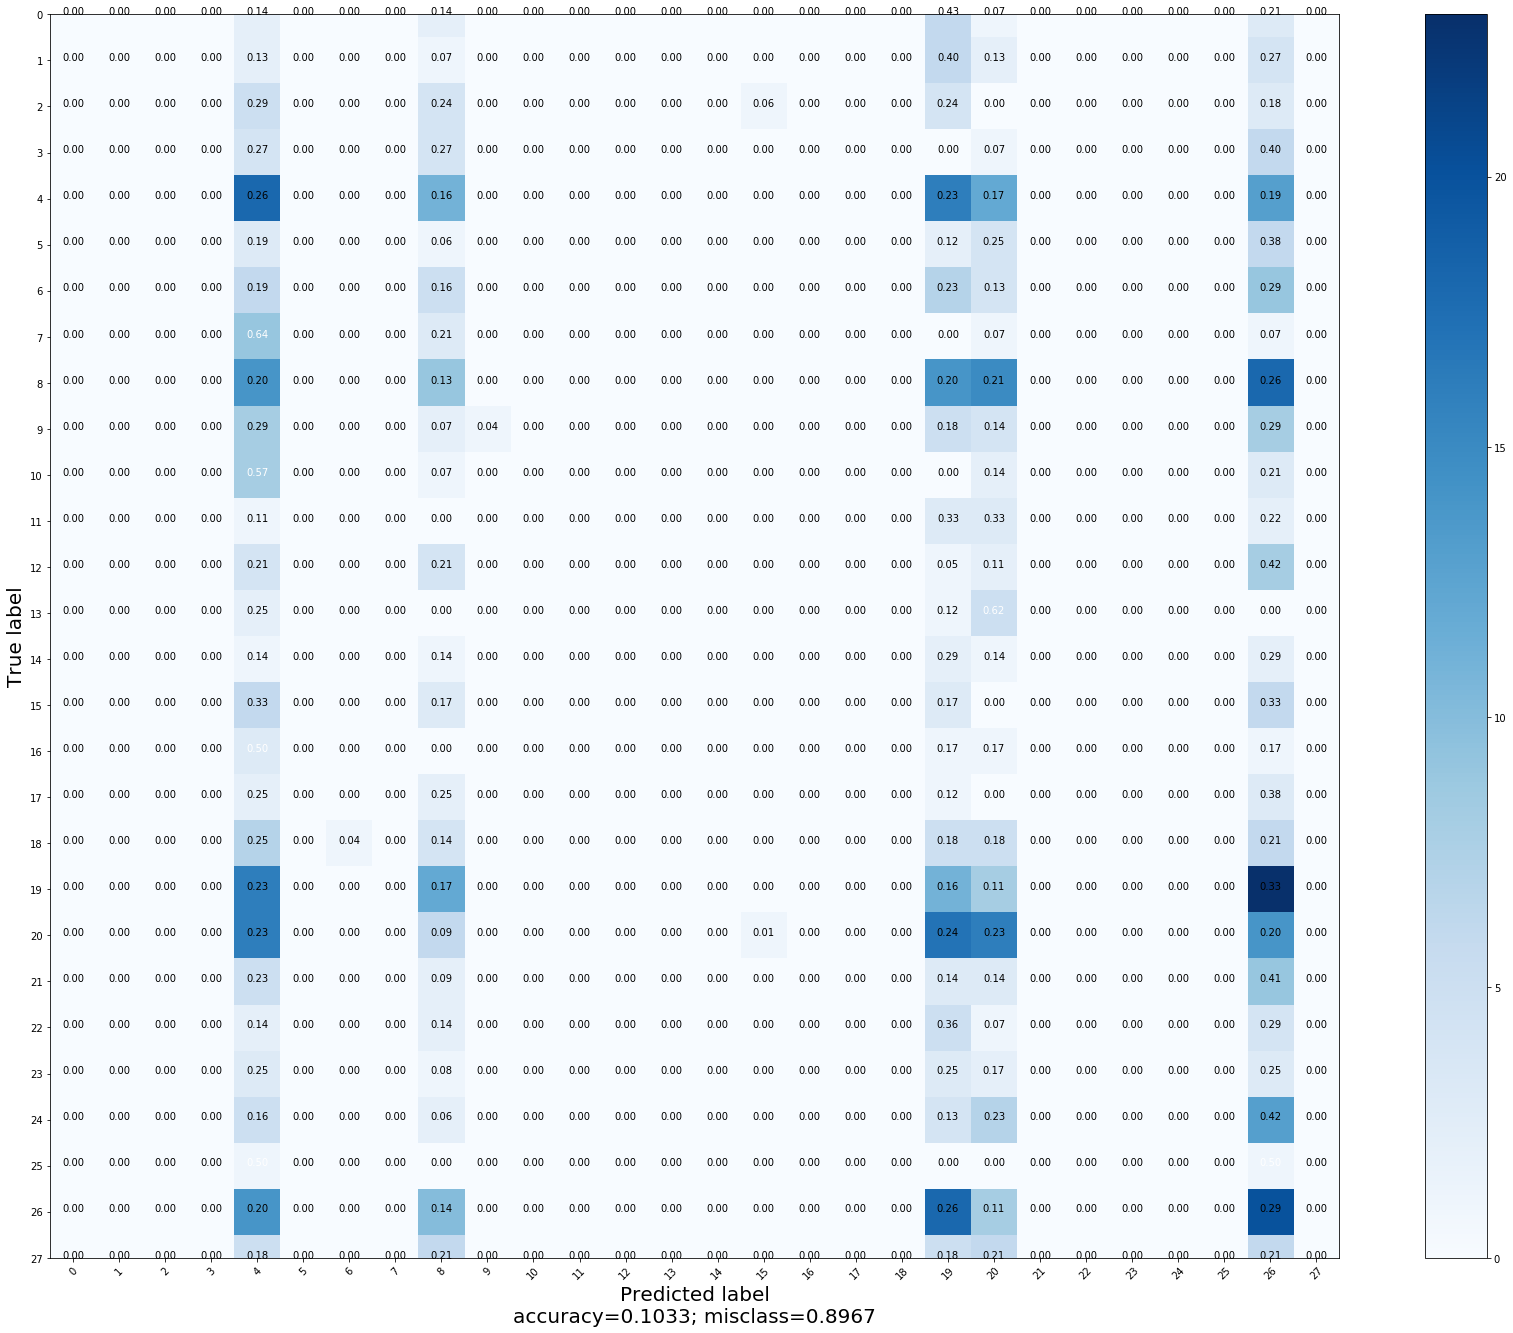

In [165]:
# plot the confusion matrix for the deep models:

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(24, 18))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title, fontsize = 22)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label', fontsize = 20)
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize = 20)
    plt.show()

cm = confusion_matrix(testY, majority_vote1)
plot_confusion_matrix(cm, range(28))

# Confusion Matrix for the combination of the ML models

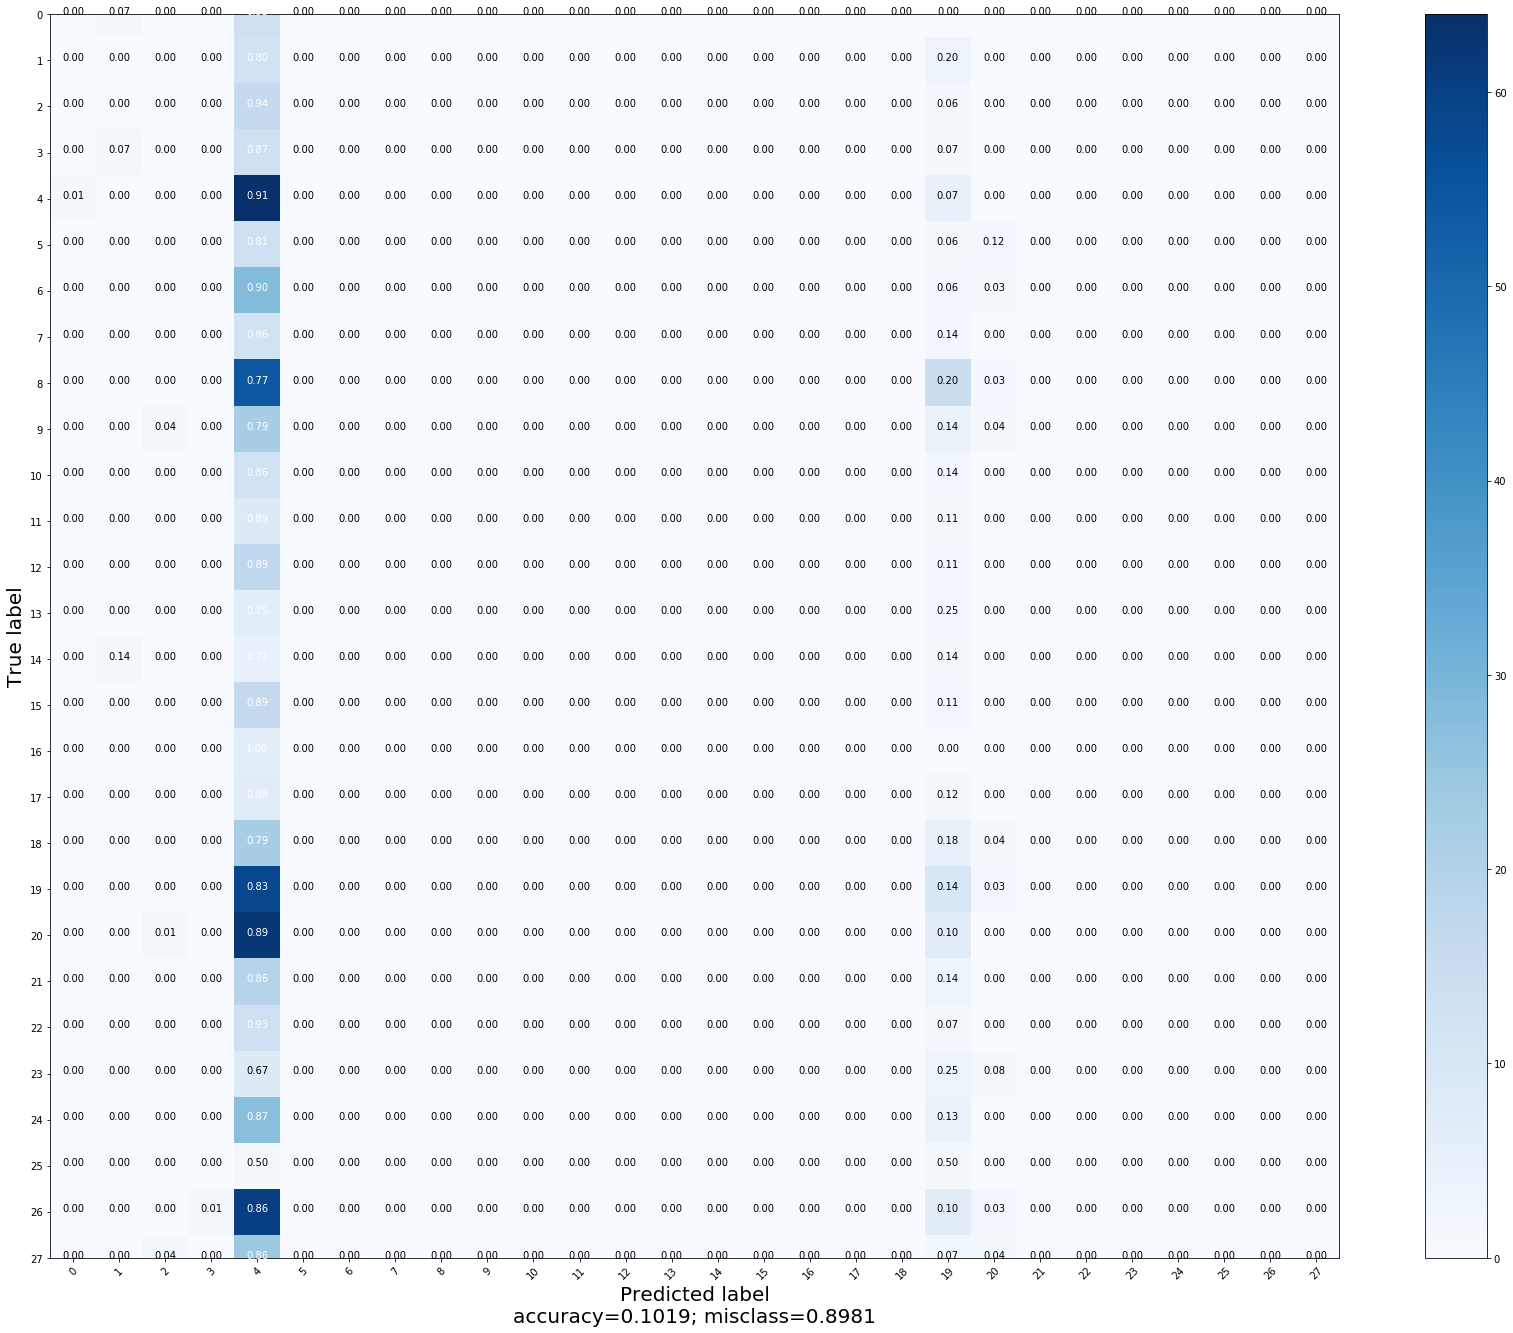

In [166]:
# plot the confusion matrix for the traditional ML models:

cm = confusion_matrix(testY, majority_vote2)
plot_confusion_matrix(cm, range(28))

# Confusion Matrix for the combination of all the models

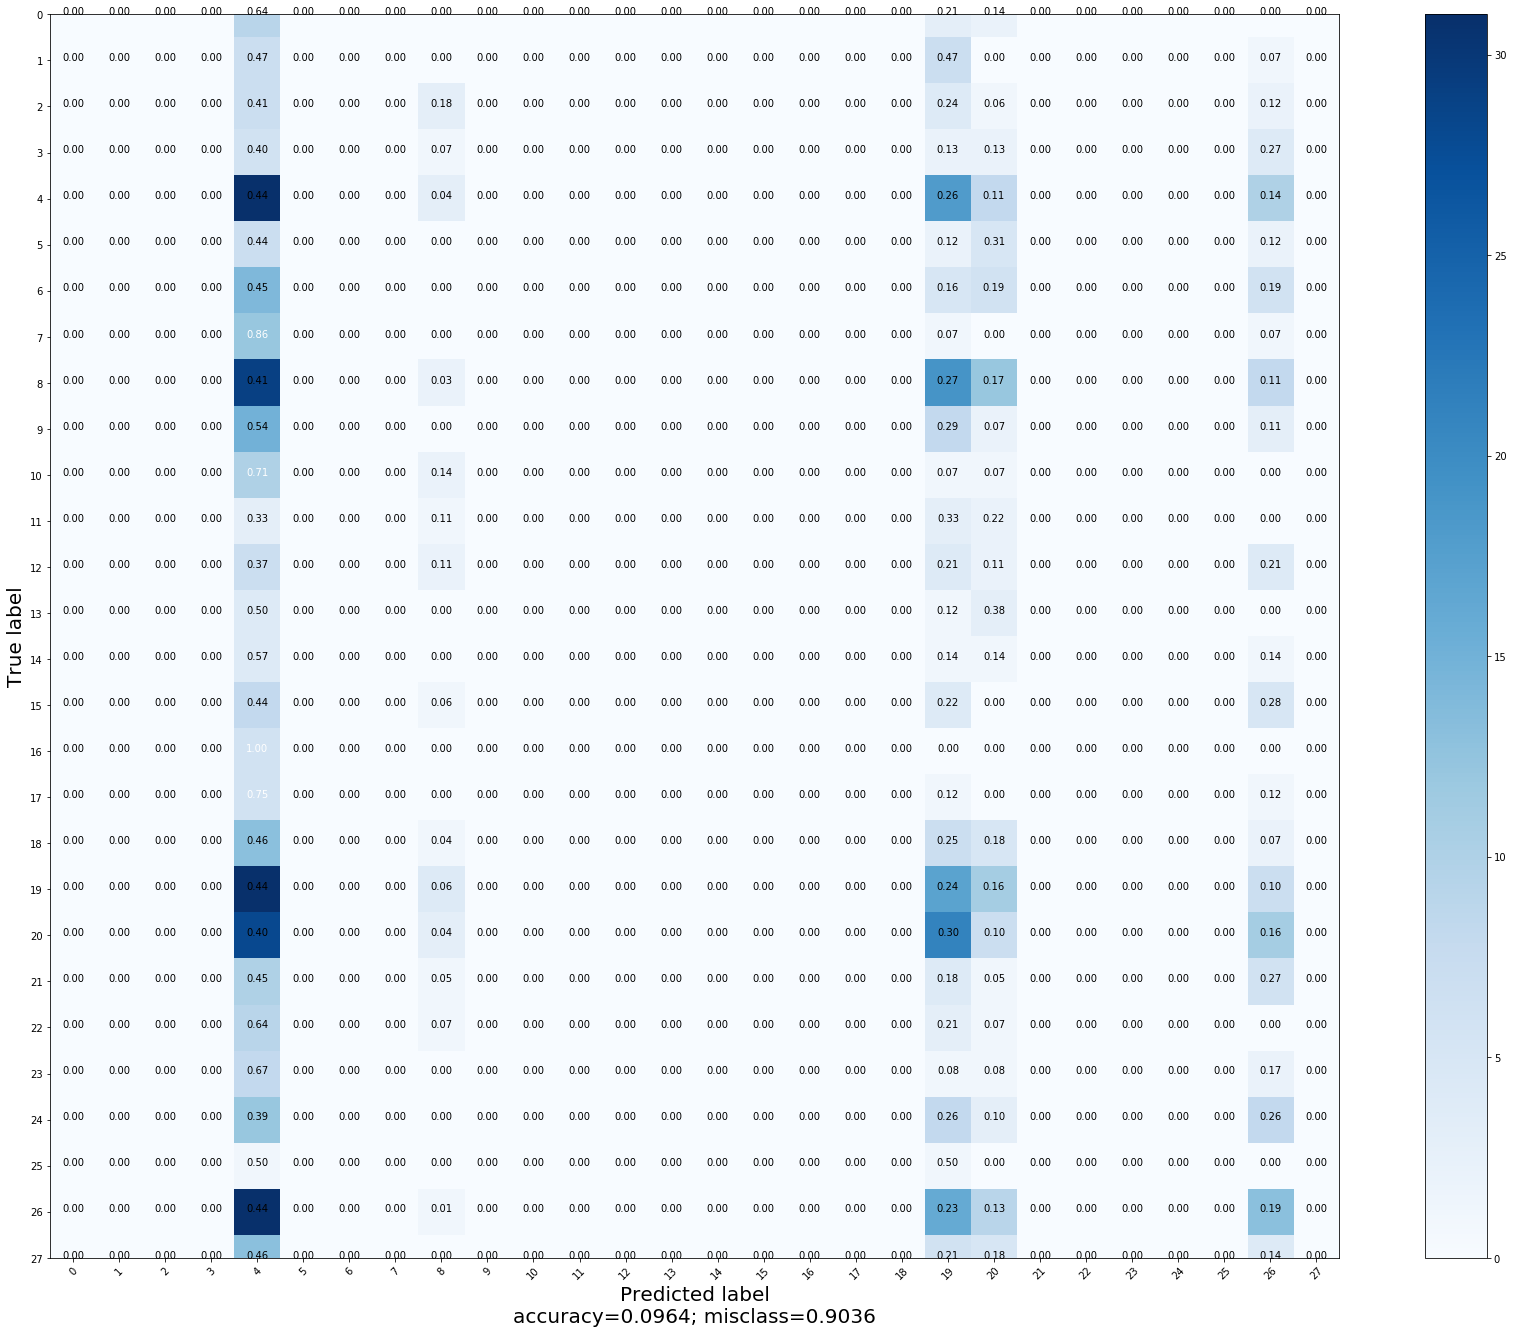

In [171]:
# plot the confusion matrix for all the models:

cm = confusion_matrix(testY, majority_vote3)
plot_confusion_matrix(cm, range(28))